In [26]:
import pandas as pd
import numpy as np

In [27]:
movies_2010s = pd.read_csv("dbs/movies-from-2010s.csv")
movies_2010s.dropna(inplace=True) # get rid of movies with null values
movies_2010s = movies_2010s.loc[movies_2010s['revenue'] > 0] # get revenues that are greater than 0
num_votes_required = movies_2010s['vote_count'].quantile(0.8)
watched_movies_2010s = movies_2010s.copy().loc[movies_2010s['vote_count'] >= num_votes_required]

In [28]:
trailers = pd.read_csv("dbs/trailers_2010s.csv").rename(columns={'title': 'trailer_title'})
trailers.head(5)

,youtube_id,trailer_title,channel_title,channel_id,description,tags,view_count,like_count,dislike_count,comment_count,tmdb_id,similarity_score
0,ksfqS4GuLfA,Book Of Eli Trailer,Sony Pictures Releasing Australia,UCQ2zp9FmJzOG_JzUJ0A-FlQ,Only At The Movies! February 25\r\nStory centr...,"['Denzel Washington', 'Gary Oldman', 'Ray Stev...",32060,47,3,10,20504,0.685185
1,kAMUv22y1og,"""The Book of Eli"" - Official Trailer [HD HQ]",watchCulturetainment,UCuJXQzdMnQuNGkYJqgIwb-w,"Coming to theatres on January 15, 2010\r\nStar...","['the', 'book', 'of', 'eli', 'film', 'official...",3325347,4505,321,1983,20504,0.750000
2,jh8mm8KR6ow,'The Book of Eli' Trailer HD,HDCIDER,UCw8uynfUyRdyK8dIZGSzlog,A lone hero must fight his way across the wast...,"[""'The"", 'Book', 'of', ""Eli'"", 'Trailer', 'HD']",43,1,0,0,20504,0.714286
3,o-v4L8OE3uA,The Book of Eli - Official Trailer,Innaloop,UC8h3JiDOhjouAGvKzPP8PNA,Visit: http://www.innaloop.com\r\n\r\nA post-a...,"['Eli', 'Denzel Washington', 'Michael Gambon',...",656,1,0,0,20504,1.000000
4,28LXGuqDUqk,The Book of Eli - Official Trailer [HD],AKAVinceanator,UCqTTUQVIWzCMmcJ54ZEEHUQ,SUBSCRIBE,"['The', 'Book', 'of', 'Eli', 'Official', 'Trai...",494,0,0,0,20504,0.857143


In [29]:
comparison = watched_movies_2010s.merge(trailers, on='tmdb_id')

In [30]:
type(comparison)

pandas.core.frame.DataFrame

In [31]:
grouped_comparison = comparison.sort_values(['tmdb_id', 'view_count'], ascending=False).groupby('tmdb_id')[['tmdb_id', 'title', 'trailer_title', 'view_count', 'similarity_score']]
grouped_comparison.head(3)

,tmdb_id,title,trailer_title,view_count,similarity_score
276,51876,Limitless,'Limitless' Trailer HD,4441524,0.500000
275,51876,Limitless,Sem Limites (2011) Trailer Nacional Legendado.,1117436,0.125000
277,51876,Limitless,LIMITLESS Trailer HD 1080p,16817,0.400000
317,50546,Just Go with It,JUST GO WITH IT - Trailer,2725592,0.833333
318,50546,Just Go with It,Just Go With It - Trailer,294952,0.833333
...,...,...,...,...,...
50,10138,Iron Man 2,Iron Man 2 - Espectacular Trailer 2 Español La...,2192748,0.363636
51,10138,Iron Man 2,IRON MAN 2 - TRAILER 2 - SUBTITULADO BY SAMYG12,32753,0.444444
67,9543,Prince of Persia: The Sands of Time,PRINCE OF PERSIA: THE SANDS OF TIME MOVIE TRAILER,5808997,0.800000
68,9543,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time - Official...,321391,0.900000


In [36]:
# comparison[comparison['title'] == 'Letters to Juliet'][['trailer_title', 'title', 'view_count', 'similarity_score']]
comparison = comparison[comparison['trailer_title'] != 'Taylor Swift - Love Story'] # 70
# comparison.loc[comparison['tmdb_id'] == 10138][['trailer_title', 'view_count', 'similarity_score']]

In [37]:
view_counts = comparison['view_count'].values
view_counts

array([   32060,  3325347,       43,      656,      494,    12597,
           1675,    44310,   311906,   117898,   956932,    18394,
            843, 11596748,      552,   236923,  6862808,   149379,
         166769,     2247,   116649,   568094, 12202469,     4786,
          42445, 10342056,  6796556,  2780213,     9188,    57267,
        1657332,     3565,  1731616,    53585,     1690,     6095,
        5517420,    89458,   168868,   160133,    19346,     4235,
        4360513,   411820,    11703,  2162424,     2560,   520204,
        1346395,    81743,  2192748,    32753,  3553451,    26920,
           4871,    37202,    90367,    10201,     7687,   670624,
         139100,   198588,  6049977,   100851,    28013,    11737,
          13021,  5808997,   321391,    15211,     1443,  4068310,
          78735,   133739,   699552,    44642,    86787,   235098,
            265,  6952535,    34198, 10893617, 10753774,     8401,
        7040154,   777568,    53214,  3769998,    90495,  4336

In [38]:
similarity_scores = comparison['similarity_score'].values
similarity_scores

array([ 0.68518519,  0.75      ,  0.71428571,  1.        ,  0.85714286,
        0.33333333,  0.42857143,  0.42857143,  0.57142857,  0.75      ,
        0.42857143,  0.42857143,  0.6       ,  0.8       ,  0.6       ,
        0.66666667,  0.72727273,  0.7       ,  0.875     ,  0.81818182,
        0.15384615,  0.28571429,  0.8       ,  0.8       ,  0.75      ,
        0.42857143,  0.45454545,  0.83333333,  0.8       ,  0.8       ,
        0.33333333,  0.5       ,  0.5       ,  0.8       ,  0.6       ,
        0.5       ,  0.75      ,  0.875     ,  0.875     ,  0.75      ,
        0.3125    ,  0.45454545,  0.625     ,  0.6969697 ,  0.57442348,
        0.2       ,  0.33333333,  0.42857143,  0.6       ,  0.4       ,
        0.36363636,  0.44444444,  0.8       ,  1.        ,  0.66666667,
        0.5       ,  0.6       ,  0.6       ,  0.75      ,  0.66666667,
        0.5       ,  0.6       ,  0.6       ,  0.8       ,  0.6       ,
        0.5       ,  0.7       ,  0.8       ,  0.9       ,  0.8 

Text(0.5, 1.0, 'Similarity Score vs View Count')

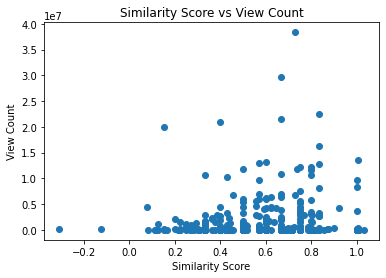

In [39]:
import matplotlib.pyplot as plt
plt.scatter(similarity_scores, view_counts)
plt.xlabel('Similarity Score')
plt.ylabel("View Count")
plt.title("Similarity Score vs View Count")